<a href="https://colab.research.google.com/github/Hellopapri/SheSTEM-Python-for-Al-and-Machine-Learning-Project/blob/main/SheSTEM_Final_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

**SECTION A: Data Import & Preprocessing**

In [2]:
df = pd.read_csv("/content/sample_data/traffic.csv")
print(df.head())
print(df.columns)

              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041
Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')


In [3]:
datetime_col = next((c for c in df.columns if "date" in c.lower() or "time" in c.lower()), None)
print("Datetime column:", datetime_col)

Datetime column: DateTime


In [4]:
df[datetime_col] = pd.to_datetime(df[datetime_col], errors="coerce")

In [5]:
df["Hour"] = df[datetime_col].dt.hour
df["Day_of_Week"] = df[datetime_col].dt.day_name()
df["Weekend"] = df[datetime_col].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)

**SECTION B: Exploratory Data Analysis (EDA)**

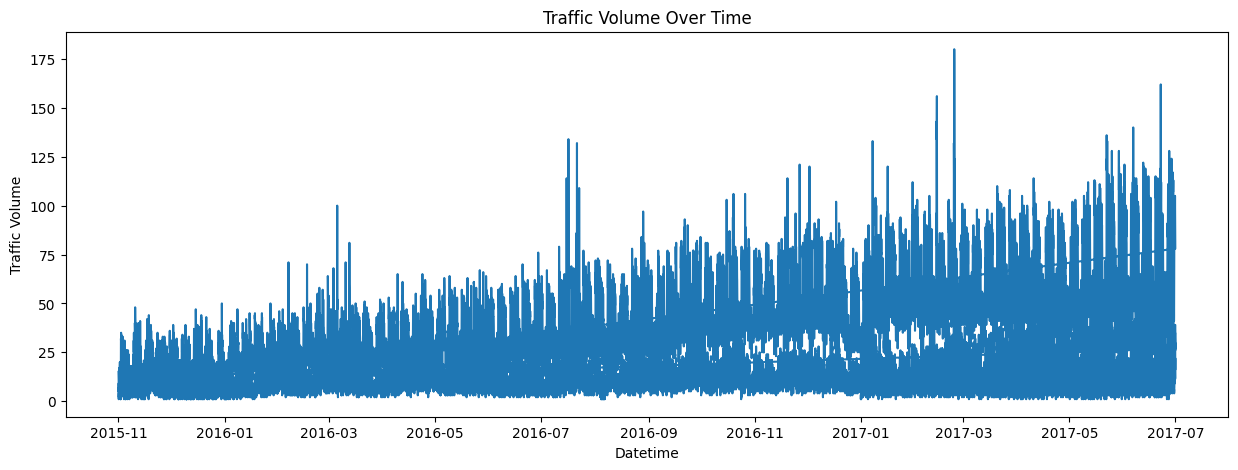

In [9]:
target_col = "Vehicles"

plt.figure(figsize=(15,5))
plt.plot(df[datetime_col], df[target_col])
plt.title("Traffic Volume Over Time")
plt.xlabel("Datetime")
plt.ylabel("Traffic Volume")
plt.show()


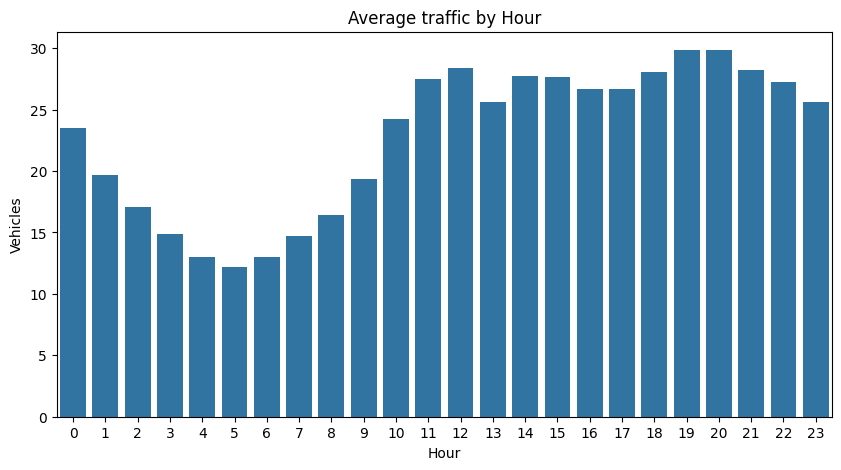

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x="Hour", y=target_col, data=df.groupby("Hour")[target_col].mean().reset_index())
plt.title("Average traffic by Hour")
plt.show()

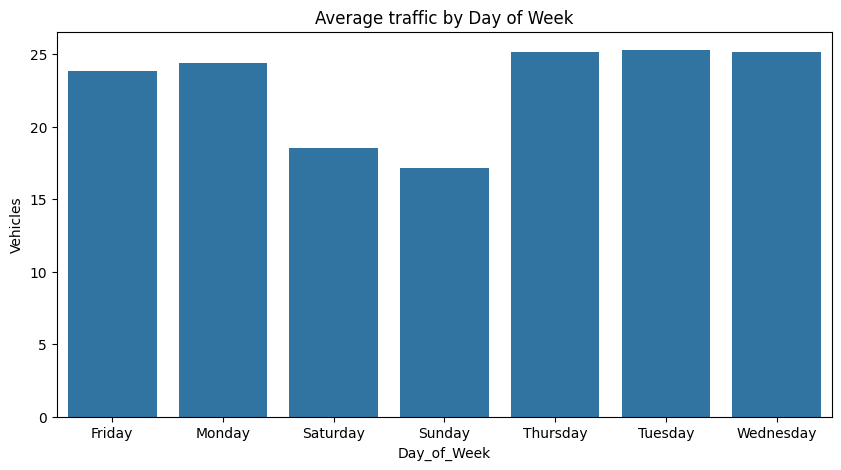

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x="Day_of_Week", y=target_col, data=df.groupby("Day_of_Week")[target_col].mean().reset_index())
plt.title("Average traffic by Day of Week")
plt.show()

**SECTION C: Model Building & Evaluation**

In [12]:
df2 = pd.get_dummies(df, columns=["Day_of_Week"], drop_first=True)

In [13]:
X = df2.drop([target_col, datetime_col, "vehicles_scaled"], axis=1, errors='ignore')
y = df2[target_col]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("LR RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("LR R2:", r2_score(y_test, y_pred_lr))

LR RMSE: 12.992448891598883
LR R2: 0.5858052340964093


In [16]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("RF RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("RF R2:", r2_score(y_test, y_pred_rf))

RF RMSE: 3.5741786080665814
RF R2: 0.9686545091763612


**SECTION D: Code Analysis & Interpretation**

In [17]:
hourly_pred = pd.DataFrame({"Hour": X_test["Hour"], "Predicted": y_pred_rf})
print("Top 3 hours high traffic:\n", hourly_pred.groupby("Hour")["Predicted"].mean().sort_values(ascending=False).head(3))

Top 3 hours high traffic:
 Hour
20    30.867995
14    28.421060
21    28.062028
Name: Predicted, dtype: float64


In [18]:
print("Feature importance:\n", pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(5))

Feature importance:
 Junction                0.518902
ID                      0.261872
Hour                    0.145011
Weekend                 0.056221
Day_of_Week_Thursday    0.004415
dtype: float64


In [19]:
errors = abs(y_test.values - y_pred_rf)
idx = errors.argmax()
print("Worst prediction at index:", idx)
print("Features:", X_test.iloc[idx].to_dict())
print("Actual:", y_test.iloc[idx], "Predicted:", y_pred_rf[idx])

Worst prediction at index: 1365
Features: {'Junction': 3, 'ID': 20161214223, 'Hour': 22, 'Weekend': 0, 'Day_of_Week_Monday': False, 'Day_of_Week_Saturday': False, 'Day_of_Week_Sunday': False, 'Day_of_Week_Thursday': False, 'Day_of_Week_Tuesday': False, 'Day_of_Week_Wednesday': True}
Actual: 79 Predicted: 25.72


**SECTION E: Reflection & Learning**

In [20]:
print("Model learned traffic patterns: higher during rush hours, lower at night, and weekend effects.")
print("I learned the importance of feature engineering (Hour, Day, Weekend) and how Random Forest identifies key features for prediction.")

Model learned traffic patterns: higher during rush hours, lower at night, and weekend effects.
I learned the importance of feature engineering (Hour, Day, Weekend) and how Random Forest identifies key features for prediction.


**SECTION F: Real-World Analogy & Critical Thinking**

In [21]:
next_hour_features = {'Hour': 8, 'Weekend': 0}
for col in X_train.columns:
    if 'Day_of_Week_' in col:
        next_hour_features[col] = 1 if col == 'Day_of_Week_Wednesday' else 0

df_next = pd.DataFrame([next_hour_features], columns=X_train.columns)

predicted_volume = rf.predict(df_next)
print("Predicted traffic volume for next hour:", predicted_volume[0])
print("This helps city planners manage congestion proactively. Unlike manual averages, the model predicts using multiple factors in real-time.")


Predicted traffic volume for next hour: 9.92
This helps city planners manage congestion proactively. Unlike manual averages, the model predicts using multiple factors in real-time.


**SECTION G: Visualization and Insights**


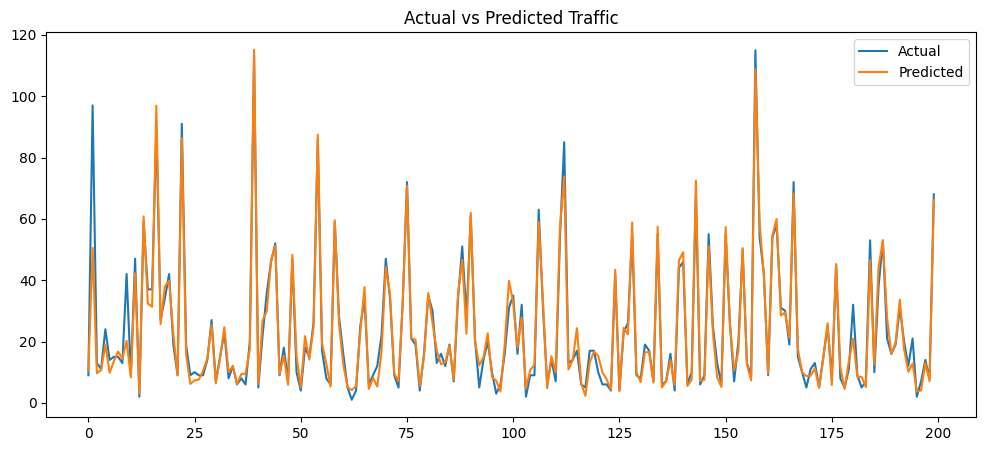

In [22]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:200], label="Actual")
plt.plot(y_pred_rf[:200], label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Traffic")
plt.show()


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1083/1083 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - loss: 0.0081 - val_loss: 0.0162
Epoch 2/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - loss: 0.0073 - val_loss: 0.0166
Epoch 3/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - loss: 0.0073 - val_loss: 0.0163
Epoch 4/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - loss: 0.0073 - val_loss: 0.0165
Epoch 5/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - loss: 0.0071 - val_loss: 0.0164
Epoch 6/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 0.0069 - val_loss: 0.0157
Epoch 7/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - loss: 0.0071 - val_loss: 0.0156
Epoch 8/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 0.0068 - val_loss: 0.0151
Epoch 9/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 0.0066 - val_loss: 0.0151
Epoch 10/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - loss: 0.0066 - val_loss: 0.0148
Epoch 11/20
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - loss: 0.0065 - val_loss: 0.0148
Epoch 12/20
1083/10

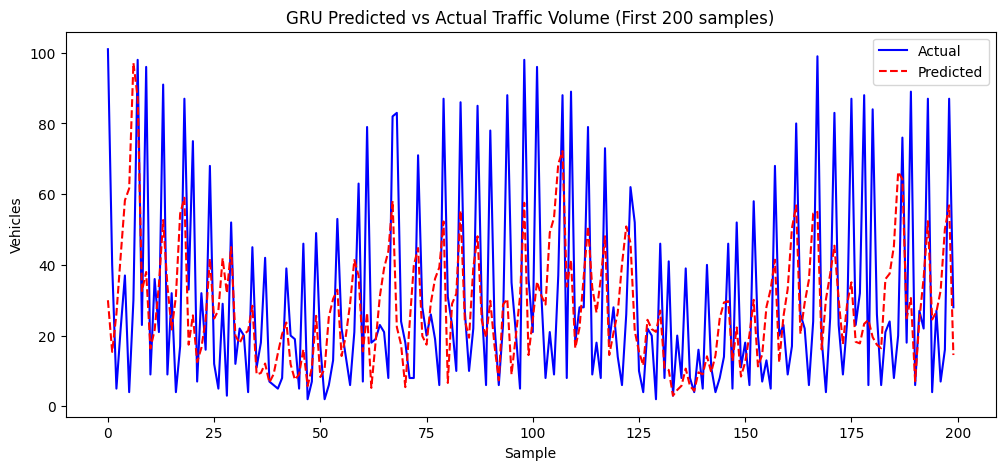

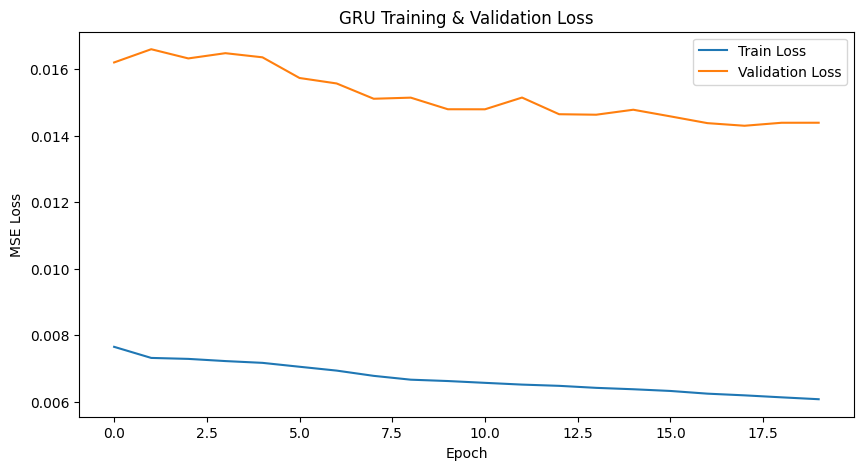

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

df_seq = df.sort_values(datetime_col)
traffic = df_seq[[target_col]].values

scaler = MinMaxScaler()
traffic_scaled = scaler.fit_transform(traffic)

def create_sequences(data, lookback=24):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

lookback = 24
X_seq, y_seq = create_sequences(traffic_scaled, lookback)

X_seq = X_seq.reshape((X_seq.shape[0], X_seq.shape[1], 1))

split = int(0.8 * len(X_seq))
X_train_seq, X_test_seq = X_seq[:split], X_seq[split:]
y_train_seq, y_test_seq = y_seq[:split], y_seq[split:]

model = Sequential()
model.add(GRU(50, input_shape=(lookback, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(
    X_train_seq, y_train_seq,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

y_pred_seq = model.predict(X_test_seq)

y_pred_seq = scaler.inverse_transform(y_pred_seq)
y_test_seq = scaler.inverse_transform(y_test_seq.reshape(-1,1))

rmse_seq = np.sqrt(mean_squared_error(y_test_seq, y_pred_seq))
print("GRU RMSE:", rmse_seq)


plt.figure(figsize=(12,5))
plt.plot(y_test_seq[:200], label="Actual", color='blue')
plt.plot(y_pred_seq[:200], label="Predicted", color='red', linestyle='--')
plt.title("GRU Predicted vs Actual Traffic Volume (First 200 samples)")
plt.xlabel("Sample")
plt.ylabel("Vehicles")
plt.legend()
plt.show()


plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("GRU Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()


**Final Explanation & Reflection**

I explored the traffic dataset and noticed s**trong daily and weekly patterns**. Traffic tends to peak during morning and evening rush hours, while weekends see lower volumes. By building **Linear Regression, Random Forest, and GRU models**, I observed how different approaches capture these trends.

The Random Forest model **highlighted important features** like Hour and Day of Week, showing how machine learning identifies patterns that are not obvious from simple averages. The GRU sequential model learned from past hourly trends, improving prediction for upcoming hours.

Through this exercise, I realized how **data preprocessing, feature engineering, and model selection** impact prediction accuracy. I also understood how predictive models can **help city planners proactively manage traffic**, allocate resources efficiently, and anticipate congestion, which manual observation alone cannot achieve.